### Assignment: Exploring PCA and Clustering on scikit-learn's  Iris Dataset (https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html):


##### Part 1:
- Create some visualizations to explore the distribution of flower types.
- Apply PCA to the dataset, and then create some visualizations using the eigenvectors recieved from PCA.  Is it easier to separate the categories like this?

##### Part 2:
- Research "Clustering" - what is it? Whats the purpose? How does it differ from what we've been doing?
- Apply different clustering models to the iris dataset (Drop the target column when doing this).  Analyze how accurate these models are compared to our known classes

In [133]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, classification_report
from sklearn import preprocessing




In [134]:
iris = datasets.load_iris()

In [139]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
X = iris.data
y = iris.target
display(df.head())
print(X)

scaler = preprocessing.StandardScaler()

X_scaled = scaler.fit_transform(X)
print(X_scaled)

df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

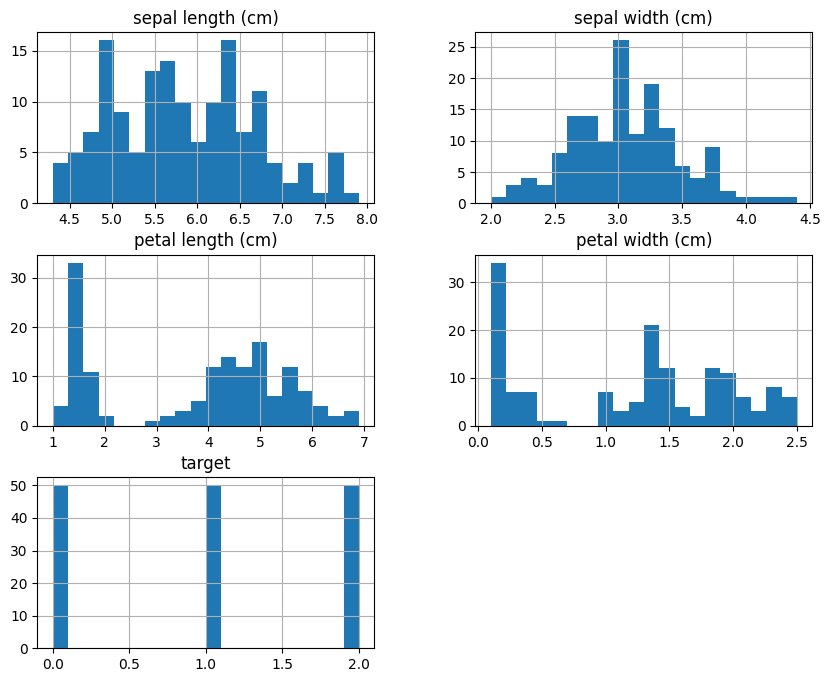

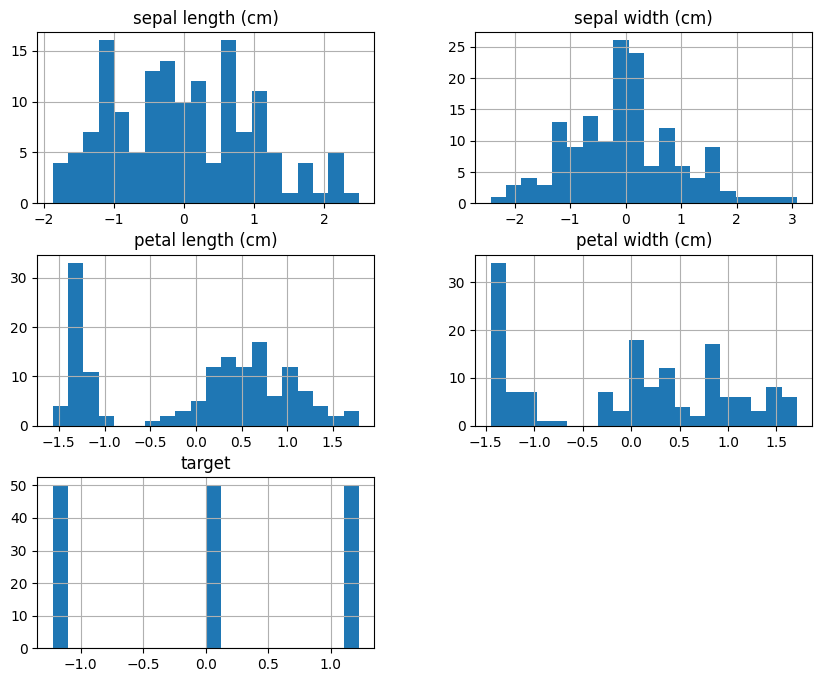

In [141]:
df.hist(bins=20, figsize=(10,8))
df_scaled.hist(bins=20, figsize=(10,8))

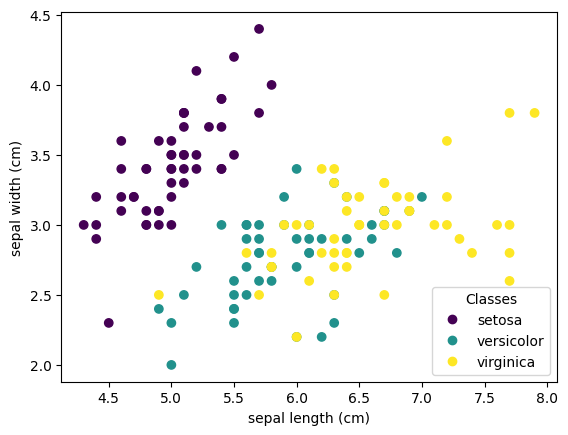

In [ ]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

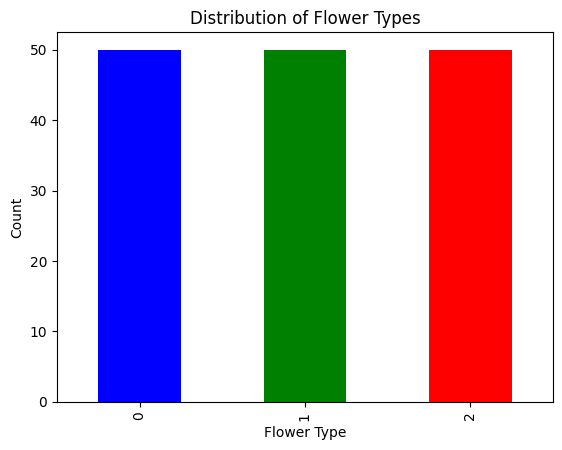

In [ ]:
df['target'].value_counts().plot(kind='bar', color=['blue', 'green', 'red'])
plt.xlabel('Flower Type')
plt.ylabel('Count')
plt.title('Distribution of Flower Types')
plt.show()

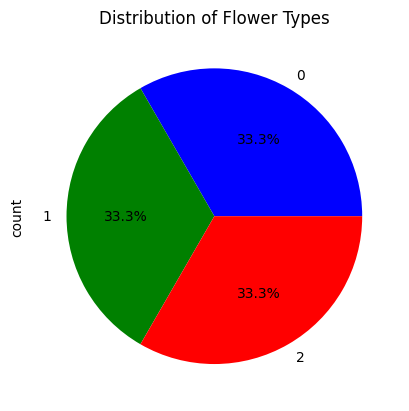

In [ ]:
df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'green', 'red'])
plt.title('Distribution of Flower Types')
plt.show()

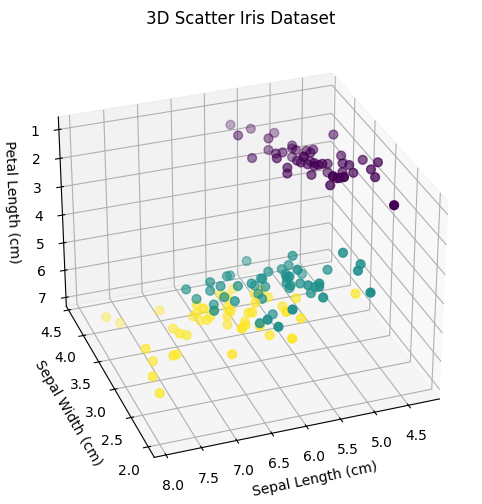

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=-150, azim=110)

ax.scatter(
    iris.data[:, 0],
    iris.data[:, 1],
    iris.data[:, 2],
    c=iris.target,
    s=40,
)

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
ax.set_title('3D Scatter Iris Dataset')

plt.show()

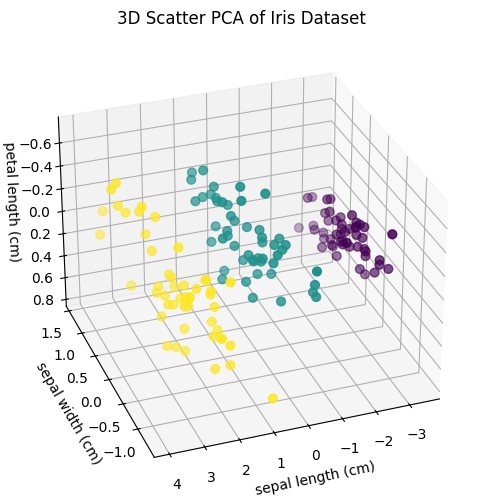

In [ ]:
pca_iris = PCA(n_components=3).fit_transform(df)

# print(pca_iris)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=-150, azim=110)

ax.scatter(
    pca_iris[:, 0],
    pca_iris[:, 1],
    pca_iris[:, 2],
    c=iris.target,
    s=40,
)

ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])
ax.set_title('3D Scatter PCA of Iris Dataset')

# ax.set_title("First three PCA dimensions")
# ax.set_xlabel("1st Eigenvector")
# ax.xaxis.set_ticklabels([])
# ax.set_ylabel("2nd Eigenvector")
# ax.yaxis.set_ticklabels([])
# ax.set_zlabel("3rd Eigenvector")
# ax.zaxis.set_ticklabels([])

plt.show()

In [ ]:
pca_df = pd.DataFrame(pca_iris)
pca_df.columns = ['Eigenvector_1', 'Eigenvector_2', 'Eigenvector_3']
pca_df['target'] = y
display(pca_df.head())

,Eigenvector_1,Eigenvector_2,Eigenvector_3,target
0,-2.865415,0.296295,0.041871,0
1,-2.892047,-0.183785,-0.175541,0
2,-3.054980,-0.174827,0.049705,0
3,-2.920230,-0.331582,0.003376,0
4,-2.906852,0.295917,0.147160,0


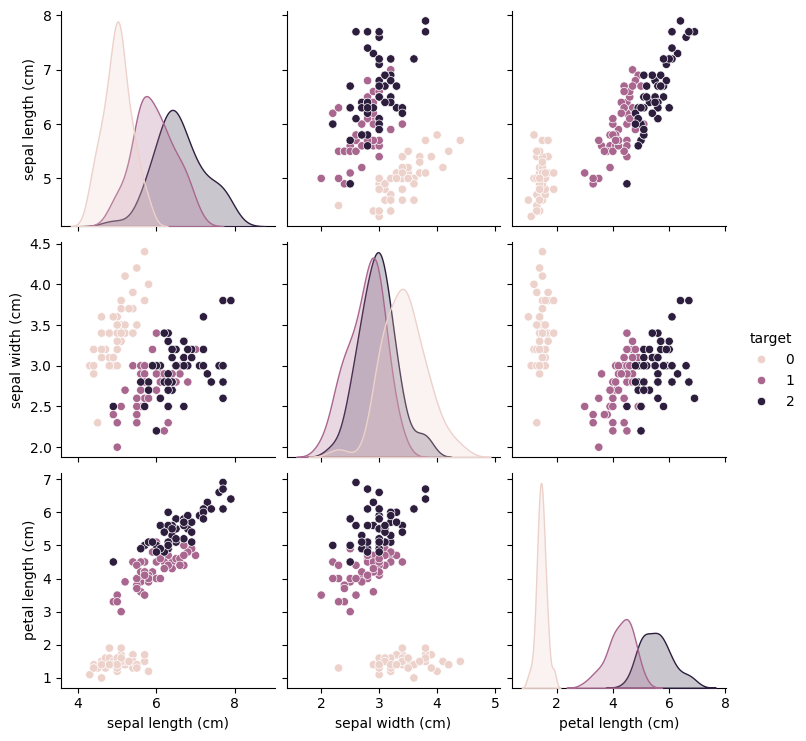

In [ ]:
sns.pairplot(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'target']], hue='target')

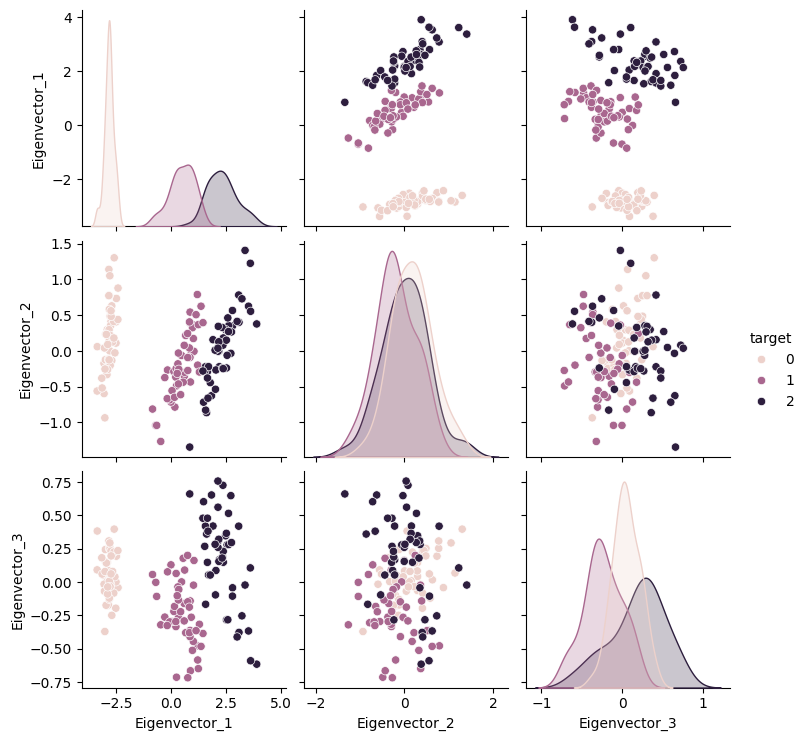

In [ ]:
sns.pairplot(pca_df, hue='target')

In [ ]:
k_means = cluster.KMeans(n_clusters=3, n_init='auto', random_state=5 )
k_means_pred = k_means.fit_predict(X)

scaled_k_means_pred = k_means.fit_predict(X_scaled)


print(k_means_pred)
print(scaled_k_means_pred)
print(y)

print(adjusted_rand_score(y, k_means_pred))
print(classification_report(y, k_means_pred))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1
 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.7302382722834697
              precision    recall  f1-score   support

        

In [ ]:
print(adjusted_rand_score(y, scaled_k_means_pred))
print(classification_report(y, scaled_k_means_pred))

0.645147003482001
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.24      0.26      0.25        50
           2       0.17      0.16      0.17        50

    accuracy                           0.47       150
   macro avg       0.47      0.47      0.47       150
weighted avg       0.47      0.47      0.47       150



In [ ]:
af = cluster.AffinityPropagation(damping=0.7)
af_pred = af.fit_predict(X)

print(adjusted_rand_score(y, af_pred))

0.645469185394275


In [ ]:
spectral = cluster.SpectralClustering(n_components=3)
spectral_pred = spectral.fit_predict(X)

print(adjusted_rand_score(y, spectral_pred))

0.5315023788352417


In [ ]:
bk_mean = cluster.BisectingKMeans()
bk_mean_pred = bk_mean.fit_predict(X)

print(adjusted_rand_score(y, bk_mean_pred))

0.45825596178601374


In [ ]:
gm = GaussianMixture(n_components=3)
gm_pred = gm.fit_predict(X)

print(adjusted_rand_score(y, gm_pred))

0.9038742317748124
